In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from pandas_profiling import ProfileReport
import joblib

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
def quality_report(df):
    
    """
    Description: Displays quality of data in terms of missing values, number of unique values,
    percentage of missing values and data type.
    
    Arguement: Dataframe
    """
    
    dtype = df.dtypes
    nunique = df.nunique()
    null_values = df.isna().sum()
    percent = (df.isna().sum()/df.count()*100).round(2)
    report_df = pd.concat([nunique, null_values, percent, dtype], axis = 1, keys = ['Nunique', 'Total_NaN', 'Percentage of NaN', 'Dtypes'])

def num_dist_plot(df):
    
    """
    Description: Plots distribution plot for the numerical features selected in the dataset passed.
    
    Arguement: Dataframe
    """
    
    for col in df.columns:
        if df[col].dtype != 'object':
            print(df[col].describe())
            plt.figure(figsize = (12, 7))
            print(col)
            plt.title('Distribution plot for ' + col)
            plot = sns.distplot(df[col])
            plt.tight_layout()
            plt.show()

In [4]:
eda_report_train = ProfileReport(data)
eda_report_train.to_file("eda-report_data.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
data.shape

(1025, 14)

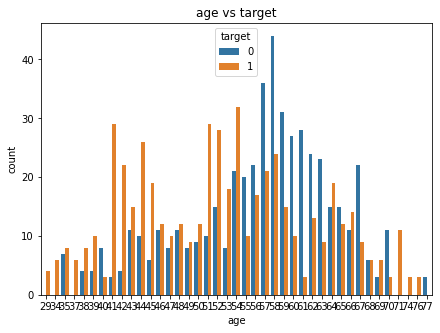

In [27]:
# %matplotlib inline
plt.figure(figsize = (7, 5))
sns.countplot(x = 'age', hue = 'target', data = data)
plt.title('age vs target')
plt.show()

In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# checking for duplicate data
display('data',data[data.duplicated()])

'data'

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [10]:
# i will not remove the duplicate files, because the data itself is very small.

In [11]:
quality_report(data)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### Treating outliers

In [13]:
data['chol'] = np.where((data['chol'] >= 400), 400, data['chol'])
data['oldpeak'] = np.where((data['oldpeak'] >= 4), 4, data['oldpeak'])

### Fearture Engineering

In [14]:
# Function for Frequency encoding
def freq_encoding(col):
    data_encoding = data.groupby(data[col]).size()/len(data)
    data[str(col) + '_freq_enc'] = data[col].map(data_encoding)

# chol
freq_encoding('chol')
# thalach
freq_encoding('thalach')
# trestbps
freq_encoding('trestbps')
# age
freq_encoding('age')

In [15]:
from sklearn.preprocessing import PolynomialFeatures

In [16]:
poly_feature_1 = ['trestbps', 'chol', 'thalach']
poly_feature_2 = ['thal', 'ca', 'slope', 'oldpeak', 'cp']

In [17]:
poly = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)

poly1 = poly.fit_transform(data[poly_feature_1])
poly2 = poly.fit_transform(data[poly_feature_2])

In [18]:
df_poly1 = pd.DataFrame(poly1, columns = [f"poly1_{i}" for i in range(poly1.shape[1])])
df_poly2 = pd.DataFrame(poly2, columns = [f"poly2_{i}" for i in range(poly2.shape[1])])

In [19]:
display(df_poly1.columns, df_poly2.columns)

Index(['poly1_0', 'poly1_1', 'poly1_2', 'poly1_3', 'poly1_4', 'poly1_5'], dtype='object')

Index(['poly2_0', 'poly2_1', 'poly2_2', 'poly2_3', 'poly2_4', 'poly2_5',
       'poly2_6', 'poly2_7', 'poly2_8', 'poly2_9', 'poly2_10', 'poly2_11',
       'poly2_12', 'poly2_13', 'poly2_14'],
      dtype='object')

In [20]:
new_data = pd.concat([data, df_poly1], axis = 1)
new_data = pd.concat([new_data, df_poly2], axis = 1)

In [21]:
new_data['chol'] = pd.qcut(new_data.chol, q = [0, .2, .4, .6, .8, 1], labels = False)
new_data['thalach'] = pd.qcut(new_data.thalach, q = [0, .2, .4, .6, .8, 1], labels = False)
new_data['trestbps'] = pd.qcut(new_data.trestbps, q = [0, .2, .4, .6, .8, 1], labels = False)

In [22]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,poly2_5,poly2_6,poly2_7,poly2_8,poly2_9,poly2_10,poly2_11,poly2_12,poly2_13,poly2_14
0,52,1,0,1,1,0,1,3,0,1.0,...,6.0,6.0,3.0,0.0,4.0,2.0,0.0,2.0,0.0,0.0
1,53,1,0,3,0,1,0,2,1,3.1,...,0.0,0.0,9.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,70,1,0,4,0,0,1,0,1,2.6,...,0.0,0.0,7.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,61,1,0,4,0,0,1,3,0,0.0,...,3.0,6.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,62,0,0,3,4,1,1,0,0,1.9,...,6.0,2.0,3.8,0.0,3.0,5.7,0.0,1.9,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,3,1,0,1,3,1,0.0,...,0.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0
1021,60,1,0,1,3,0,0,1,1,2.8,...,3.0,3.0,8.4,0.0,1.0,2.8,0.0,2.8,0.0,0.0
1022,47,1,0,0,3,0,0,0,1,1.0,...,2.0,2.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1023,50,0,0,0,2,0,0,3,0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
train = new_data.head(775)
test = new_data.head(250)

In [24]:
train.to_csv('train.csv', index = False)
test.to_csv('test.csv', index = False)

In [16]:
from catboost import Pool, CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score, log_loss, make_scorer, accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from collections import Counter
from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.pipeline import Pipeline

In [26]:
# load dataset
train = pd.read_csv('train.csv')
test =  pd.read_csv('test.csv')

#### Splitting dataset

In [27]:
y = train['target']
X = train.drop('target', axis = 1)

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.22, random_state = 43)

In [30]:
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = pd.DataFrame(sc.transform(X_train), index = X_train.index, columns = X_train.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test), index = X_test.index, columns = X_test.columns)

In [31]:
# training with scaled data
# train_pool = Pool(X_train_sc, y_train)
# test_pool = Pool(X_test_sc, y_test)

cat = CatBoostClassifier(verbose = 0)
cat.fit(X_train_sc, y_train)
pred_sc = cat.predict(X_test_sc)

print('F1_score')
print(f1_score(y_test, pred_sc))
print('\nAccuracy_score')
print(accuracy_score(y_test, pred_sc))
print('\nROC_AUC')
print(roc_auc_score(y_test, pred_sc))

F1_score
0.9717514124293786

Accuracy_score
0.9707602339181286

ROC_AUC
0.9704433497536945


In [32]:
X = test.drop('target', axis = 1)

In [33]:
pred = pd.Series(cat.predict(X))

In [34]:
actual = test.target

In [35]:
measure = pd.concat([pred, actual], axis = 1, keys = ['pred', 'actual'], ignore_index = True)

In [36]:
measure.to_csv('measure.csv')

In [37]:
skf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
sc = StandardScaler()
cat_f1_scores = []
cat_proba = []
thresh = 0.4
for fold,(tr_in,te_in) in enumerate(skf.split(X,y)):
    print("=======Fold{fold}=======".format(fold=fold+1))
    X_train,X_test = X.iloc[tr_in],X.iloc[te_in]
    y_train,y_test = y.iloc[tr_in],y.iloc[te_in]
    cat1 = CatBoostClassifier(n_estimators = 500, verbose = 0)
    cat1.fit(X_train,y_train, eval_set = [(X_train,y_train),(X_test,y_test)], early_stopping_rounds = 300, use_best_model = True)
    cat_f1_scores.append(f1_score(y_test,cat1.predict(X_test)))
    cat_proba.append(f1_score(y_test, np.where(cat1.predict_proba(X_test)[:,1] > thresh, 1, 0)))
    print(f1_score(y_test,cat1.predict(X_test)))
    print(f1_score(y_test, np.where(cat1.predict_proba(X_test)[:,1] > thresh, 1, 0)),'\n')

print('cat_score: ' + str(np.mean(cat_f1_scores)))
print('cat_proba: ' + str(np.mean(cat_proba)))

ValueError: Found input variables with inconsistent numbers of samples: [250, 775]

In [ ]:
y_pred = np.array(cat1.predict(X_test), dtype = np.int)

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names = ['FAILURE', 'SUCCESS'])

plt.figure(figsize= (6,6))
sns.heatmap(cm, annot = True, fmt = 'g', vmin = 0, cmap = 'Blues', cbar = False)
plt.xticks(ticks = np.arange(2) + 0.5, labels = ['FAILURE', 'SUCCESS'])
plt.yticks(ticks = np.arange(2) + 0.5, labels = ['FAILURE', 'SUCCESS'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print('\n\t\tClassification Report:\n\t--------------------------------------\n', clr)

In [ ]:
# # training without scaled data

# rf = RandomForestClassifier(n_estimators=500,oob_score=True,n_jobs=1,max_features=None,min_samples_leaf=30)
# rf.fit(X_train_sc,y_train)
# pred = rf.predict(X_test_sc)
# pred_proba = rf.predict_proba(X_test_sc)[:,1]

# print('F1_score')
# print(f1_score(y_test, pred))
# print('\nAccuracy_score')
# print(accuracy_score(y_test, pred))
# print('\nROC_AUC')
# print(roc_auc_score(y_test, pred))

#### Feature Importance

In [38]:
feat_imp_df = pd.DataFrame(cat.feature_importances_, columns = ['Importance'])
feat_imp_df['Features'] = X.columns

In [39]:
plt.figure(figsize = (26, 12))
sns.barplot(x = 'Importance', y = 'Features', data = feat_imp_df.sort_values(by = ['Importance'], ascending = False).head(50))
plt.show()

In [17]:
# creating a function to capture all processes
def model(p_dataset):
    # splitting dataset
    y = p_dataset['target']
    X = p_dataset.drop('target', axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.22, random_state = 43)
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_sc = pd.DataFrame(sc.transform(X_train), index = X_train.index, columns = X_train.columns)
    X_test_sc = pd.DataFrame(sc.transform(X_test), index = X_test.index, columns = X_test.columns)
    cat = CatBoostClassifier(verbose = 0)
    cat.fit(X_train_sc, y_train)
    pred = cat.predict(X_test_sc)
    # measuring performance / metrics    
    return f1_score(y_test, pred), accuracy_score(y_test, pred), roc_auc_score(y_test, pred)

In [18]:
print(model(new_data))

(1.0, 1.0, 1.0)
